<a href="https://colab.research.google.com/github/cecordobat/AirlineProject/blob/main/Entregable1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrega 3- Analisis de datos**
---

Catalina Rengifo

#Introducción

El presente reporte tiene como objetivo aplicar técnicas de análisis exploratorio de datos y modelado predictivo en dos bases de datos:  Titanic y  Housing.

En la base de Housing se trabajó con un enfoque de regresión lineal para explicar la variación en los precios promedio de las viviendas a partir de variables relacionadas con características estructurales, educativas y socioeconómicas. Este análisis con apoyo de IA permitió no solo medir la relación de cada predictor con el valor de las viviendas, sino también detectar patrones que influyen en los precios inmobiliarios.

En el caso del Titanic, se analizaron variables sociodemográficas y de viaje para predecir la probabilidad de supervivencia de los pasajeros, utilizando modelos de clasificación supervisada. Esto permitió identificar los factores más influyentes en la supervivencia y evaluar el desempeño del modelo de Clasificación.



## **1. Librerías**
---

In [ ]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerías cargadas exitosamente")

Librerías cargadas exitosamente


## **2. Primera Parte**- Housing
---

In [ ]:
!pip install -q gdown
import gdown
file_id = "1ZzNJvwgYFU8wDmrzkgF5fyKJMfse5hQ_"
output = "housing.csv"
# Descargar el archivo desde Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

df = pd.read_csv(output)

#https://drive.google.com/file/d/1ZzNJvwgYFU8wDmrzkgF5fyKJMfse5hQ_/view?usp=sharing #

Downloading...
From: https://drive.google.com/uc?id=1ZzNJvwgYFU8wDmrzkgF5fyKJMfse5hQ_
To: /content/housing.csv
100%|██████████| 12.4k/12.4k [00:00<00:00, 25.4MB/s]


## Variables del Dataset

RM → Average number of rooms per dwelling → el número promedio de habitaciones por casa.

LSTAT → Percentage of lower status population → porcentaje de población de bajo nivel socioeconómico en la zona.

PTRATIO → Pupil–teacher ratio by town → relación de alumnos por maestro en las escuelas del área (indicador de calidad educativa).

MEDV → Median value of owner-occupied homes in $1000s → valor medio de las casas ocupadas por sus dueños (en miles de dólares).

## exploración

In [ ]:
pd.set_option('display.max_columns', None)
pd.concat([df.head(2), df.tail(2)])

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [ ]:
df.dtypes

,0
RM,float64
LSTAT,float64
PTRATIO,float64
MEDV,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [ ]:
# Eliminar duplicados
df=df.drop_duplicates()

In [ ]:
# Eliminar datos nulos
nulos_por_var = df.isnull().sum()
print(nulos_por_var)

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [ ]:
# Eliminar nulos
df = df.dropna().reset_index(drop=True)

In [ ]:
# Base final
pd.concat([df.head(2), df.tail(2)])

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Del anterior Describe se puede observar que:

*RM (número de habitaciones promedio por vivienda):

Media ≈ 6.24 habitaciones, con un mínimo de 3.56 y máximo de 8.39.

La dispersión es baja (std ≈ 0.64), lo que indica que la mayoría de las casas tienen entre 5.8 y 6.5 habitaciones (rango intercuartílico).
Esto sugiere que el tamaño de las viviendas está relativamente concentrado alrededor de 6 habitaciones.

*LSTAT (% de población de bajo nivel socioeconómico):

Media ≈ 12.9%, con un mínimo de 1.98% y un máximo de 37.97%.
Mucha variabilidad (std ≈ 7.08).
Esto significa que en algunos barrios la pobreza es muy baja, mientras que en otros es bastante alta.

*PTRATIO (relación alumno/profesor en las escuelas del área):

Media ≈ 18.5, con valores entre 12.6 y 22.
Relativamente homogéneo (std ≈ 2.11).
Esto indica que la calidad educativa (vista por esta métrica) no varía demasiado entre zonas.

*MEDV (valor medio de las viviendas en dólares):

Media ≈ 454,000 USD, con un rango muy amplio: de 105,000 a más de 1,024,000 USD.
Gran variabilidad (std ≈ 165,000).
Esto muestra una fuerte desigualdad en el valor de las propiedades según la zona.

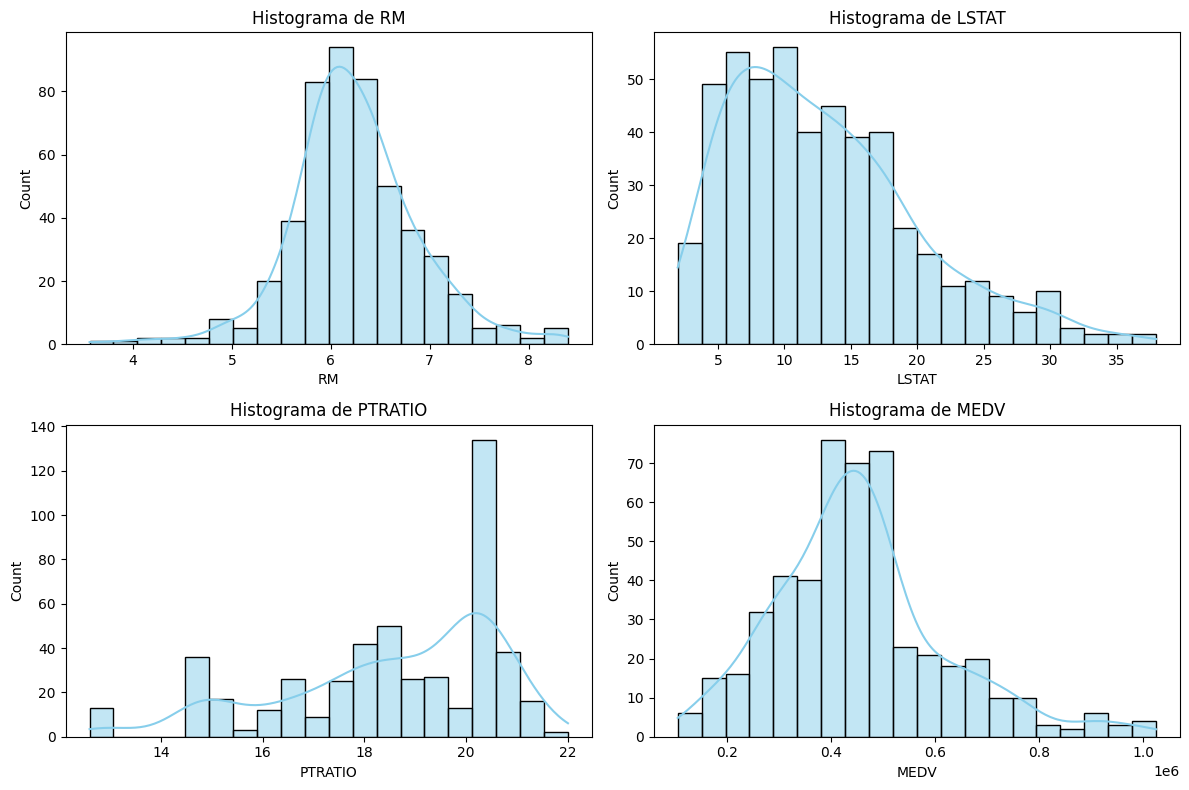

In [ ]:
variables = df.columns

# Crear figura  2x2
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Recorrer cada variable y graficar en su subplot
for i, var in enumerate(variables):
    fila = i // 2   # fila 0 o 1
    col  = i % 2    # columna 0 o 1
    sns.histplot(df[var], bins=20, kde=True, ax=axes[fila, col], color='skyblue')
    axes[fila, col].set_title(f'Histograma de {var}')

plt.tight_layout()
plt.show()


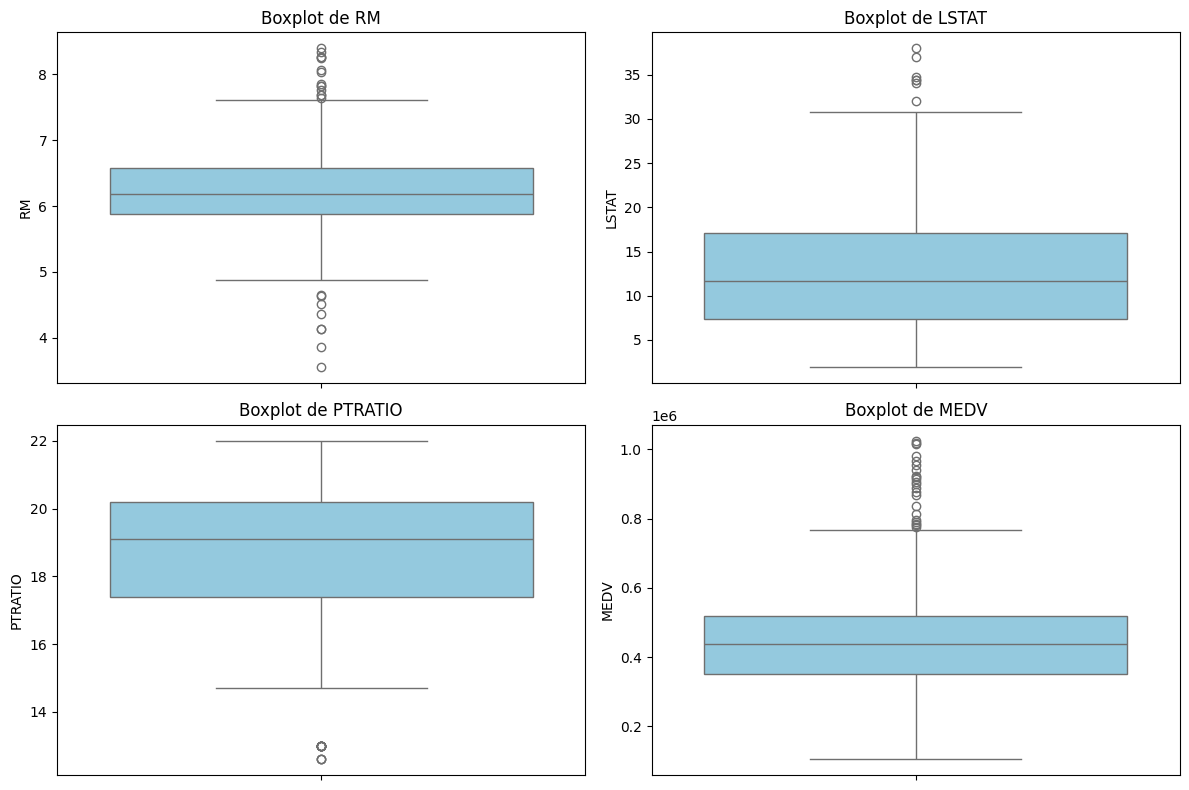

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Loop para graficar cada variable
for i, var in enumerate(variables):
    fila = i // 2
    col = i % 2
    sns.boxplot(y=df[var], ax=axes[fila, col], color='skyblue')
    axes[fila, col].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

### Regresiones

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:

# REG Simple RM
# Variable predictora (X) y variable objetivo (y)
X = df[['RM']]
y = df['MEDV']
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
modelo = LinearRegression()

# Entrenar modelo
modelo.fit(X_train, y_train)

# Predecir en test
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("RMSE:", rmse)
print("R²:", r2)

Coeficientes: [176526.28588093]
Intercepto: -642884.4934184274
RMSE: 115595.95012875243
R²: 0.3919980373501618


In [ ]:
# REG Simple lstat
# Variable predictora (X) y variable objetivo (y)
X = df[['LSTAT']]
y = df['MEDV']
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
modelo = LinearRegression()

# Entrenar modelo
modelo.fit(X_train, y_train)

# Predecir en test
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("RMSE:", rmse)
print("R²:", r2)

Coeficientes: [-17932.70888024]
Intercepto: 691953.295314267
RMSE: 97395.58627091907
R²: 0.5683832447025089


In [ ]:
# REG Simple PTRATIO
# Variable predictora (X) y variable objetivo (y)
X = df[['PTRATIO']]
y = df['MEDV']
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
modelo = LinearRegression()

# Entrenar modelo
modelo.fit(X_train, y_train)

# Predecir en test
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("RMSE:", rmse)
print("R²:", r2)

Coeficientes: [-40846.66420051]
Intercepto: 1215029.3014941635
RMSE: 134558.5104265058
R²: 0.176161497867798


In [ ]:
# REG Multiple
# Variable predictora (X) y variable objetivo (y)
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
modelo = LinearRegression()

# Entrenar modelo
modelo.fit(X_train, y_train)

# Predecir en test
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("RMSE:", rmse)
print("R²:", r2)

Coeficientes: [ 87322.20361861 -10620.63731522 -19324.4102965 ]
Intercepto: 408027.654168077
RMSE: 82395.54332162566
R²: 0.691093400309851


**A continuación, se detalla las conclusiones de los modelos de regresión aplicados a la base de datos:**



###Regresiones Simples:

*RM (Número promedio de habitaciones): El modelo de regresión simple con RM como predictor tiene un R² de 0.39, lo que indica que aproximadamente el 39% de la variabilidad en el valor medio de las viviendas (MEDV) puede ser explicada por el número promedio de habitaciones. El coeficiente positivo (176526.29) sugiere que, en promedio, por cada habitación adicional, el valor de la vivienda aumenta en aproximadamente 176,526.
El RMSE es de 115595.95, lo que representa el error típico en la predicción del valor de la vivienda.

*LSTAT (Porcentaje de población de bajo nivel socioeconómico):
 El modelo de regresión simple con LSTAT tiene un R² de 0.57, lo que significa que alrededor del 57% de la variabilidad en MEDV es explicada por el porcentaje de población de bajo nivel socioeconómico. El coeficiente negativo (-17932.71) indica que, a medida que aumenta el porcentaje de población de bajo nivel socioeconómico, el valor de la vivienda tiende a disminuir en aproximadamente 76,526. El RMSE es de 115595.95, lo que representa el error típico en la predicción del valor de la vivienda.

*PTRATIO (Relación alumno/profesor): El modelo de regresión simple con PTRATIO tiene el R² más bajo 0.18, explicando solo el 18% de la variabilidad en MEDV. El coeficiente negativo (-40846.66) sugiere que una mayor relación alumno/profesor está asociada con un menor valor de la vivienda, disminuyendo en aproximadamente $40,847 por cada aumento unitario en la relación. El RMSE es el más alto (134558.51), indicando una menor precisión en la predicción comparado con los otros modelos simples.
Regresión Múltiple (RM, LSTAT, PTRATIO):

###Regresión múltiple

*El modelo de regresión múltiple que incluye las tres variables (RM, LSTAT, y PTRATIO) tiene un R² de 0.69, lo que significa que aproximadamente el 69% de la variabilidad en el valor medio de las viviendas puede ser explicada por la combinación lineal de estas tres variables. Este R² es significativamente mayor que el de cualquiera de las regresiones simples, lo que indica que la combinación de estas variables proporciona un mejor ajuste al modelo.

El RMSE para el modelo múltiple es de 82395.54, que es menor que los RMSE de los modelos de regresión simple, lo que sugiere que el modelo múltiple tiene, en general, predicciones más precisas.

Los coeficientes para el modelo múltiple son: RM (87322.20), LSTAT (-10620.64) y PTRATIO (-19324.41). Estos coeficientes representan el cambio estimado en MEDV por un aumento unitario en cada variable, manteniendo las otras variables constantes. Los signos de los coeficientes son consistentes con las regresiones simples (positivo para RM, negativo para LSTAT y PTRATIO).
Conclusión General:

La regresión múltiple utilizando RM, LSTAT y PTRATIO como predictores es el modelo que mejor explica la variabilidad en el valor medio de las viviendas (MEDV) entre los modelos probados, con un R² de 0.69 y el menor RMSE. Esto sugiere que la combinación de estas tres características es más efectiva para predecir los precios de las viviendas que cualquiera de ellas por separado. LSTAT parece ser el predictor individual más fuerte entre las variables consideradas en las regresiones simples.


## **2. Segunda parte**- Titanic
---

In [ ]:
!pip install -q gdown
import gdown
file_id = "1-3WcI88_Cbm7aGQ8ipz2bcfnTtpdckBA"
output = "titanic.csv"
# Descargar el archivo desde Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


df = pd.read_csv(output)

#https://drive.google.com/file/d/1-3WcI88_Cbm7aGQ8ipz2bcfnTtpdckBA/view?usp=sharing #

Downloading...
From: https://drive.google.com/uc?id=1-3WcI88_Cbm7aGQ8ipz2bcfnTtpdckBA
To: /content/titanic.csv
100%|██████████| 60.3k/60.3k [00:00<00:00, 2.85MB/s]


## Variables del dataset

* PassengerId → Identificador único del pasajero.


* Survived → Supervivencia.

      0 = No sobrevivió

      1 = Sí sobrevivió

* Pclass → Clase del boleto del pasajero:

      1 = Primera clase (alta)

      2 = Segunda clase (media)

      3 = Tercera clase (baja)

* Name → Nombre completo del pasajero.

* Sex → Sexo del pasajero (male, female).

* Age → Edad del pasajero (en años)

* SibSp → Número de hermanos o esposos/as a bordo del Titanic.

* Parch → Número de padres o hijos a bordo del Titanic.

* Ticket → Número del boleto.

* Fare → Tarifa pagada por el pasajero (en libras).

* Cabin → Número de cabina

* Embarked → Puerto de embarque:

      C = Cherbourg

      Q = Queenstown

      S = Southampton

## exploración

In [ ]:
pd.set_option('display.max_columns', None)
pd.concat([df.head(2), df.tail(2)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Eliminar duplicados
df=df.drop_duplicates()

In [ ]:
# Eliminar datos nulos
nulos_por_var = df.isnull().sum()
print(nulos_por_var)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Eliminar nulos
df = df.dropna().reset_index(drop=True)

In [ ]:
# Base final
pd.concat([df.head(2), df.tail(2)])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
182,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked']]

print(df.head())

   Survived  Pclass     Sex   Age     Fare Cabin Embarked
0         0       3    male  22.0   7.2500   NaN        S
1         1       1  female  38.0  71.2833   C85        C
2         1       3  female  26.0   7.9250   NaN        S
3         1       1  female  35.0  53.1000  C123        S
4         0       3    male  35.0   8.0500   NaN        S


De la exploracion inicial anterior se puede observar que:

En este dataset tampoco se encontraron datos nulos por lo tanto la limpieza realizada no impacto la integridad de los datos.

Las 12 variables son descriptivas por lo tanto requiere una analisis cualitativo

/tmp/ipython-input-62868777.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1,1], palette="coolwarm")


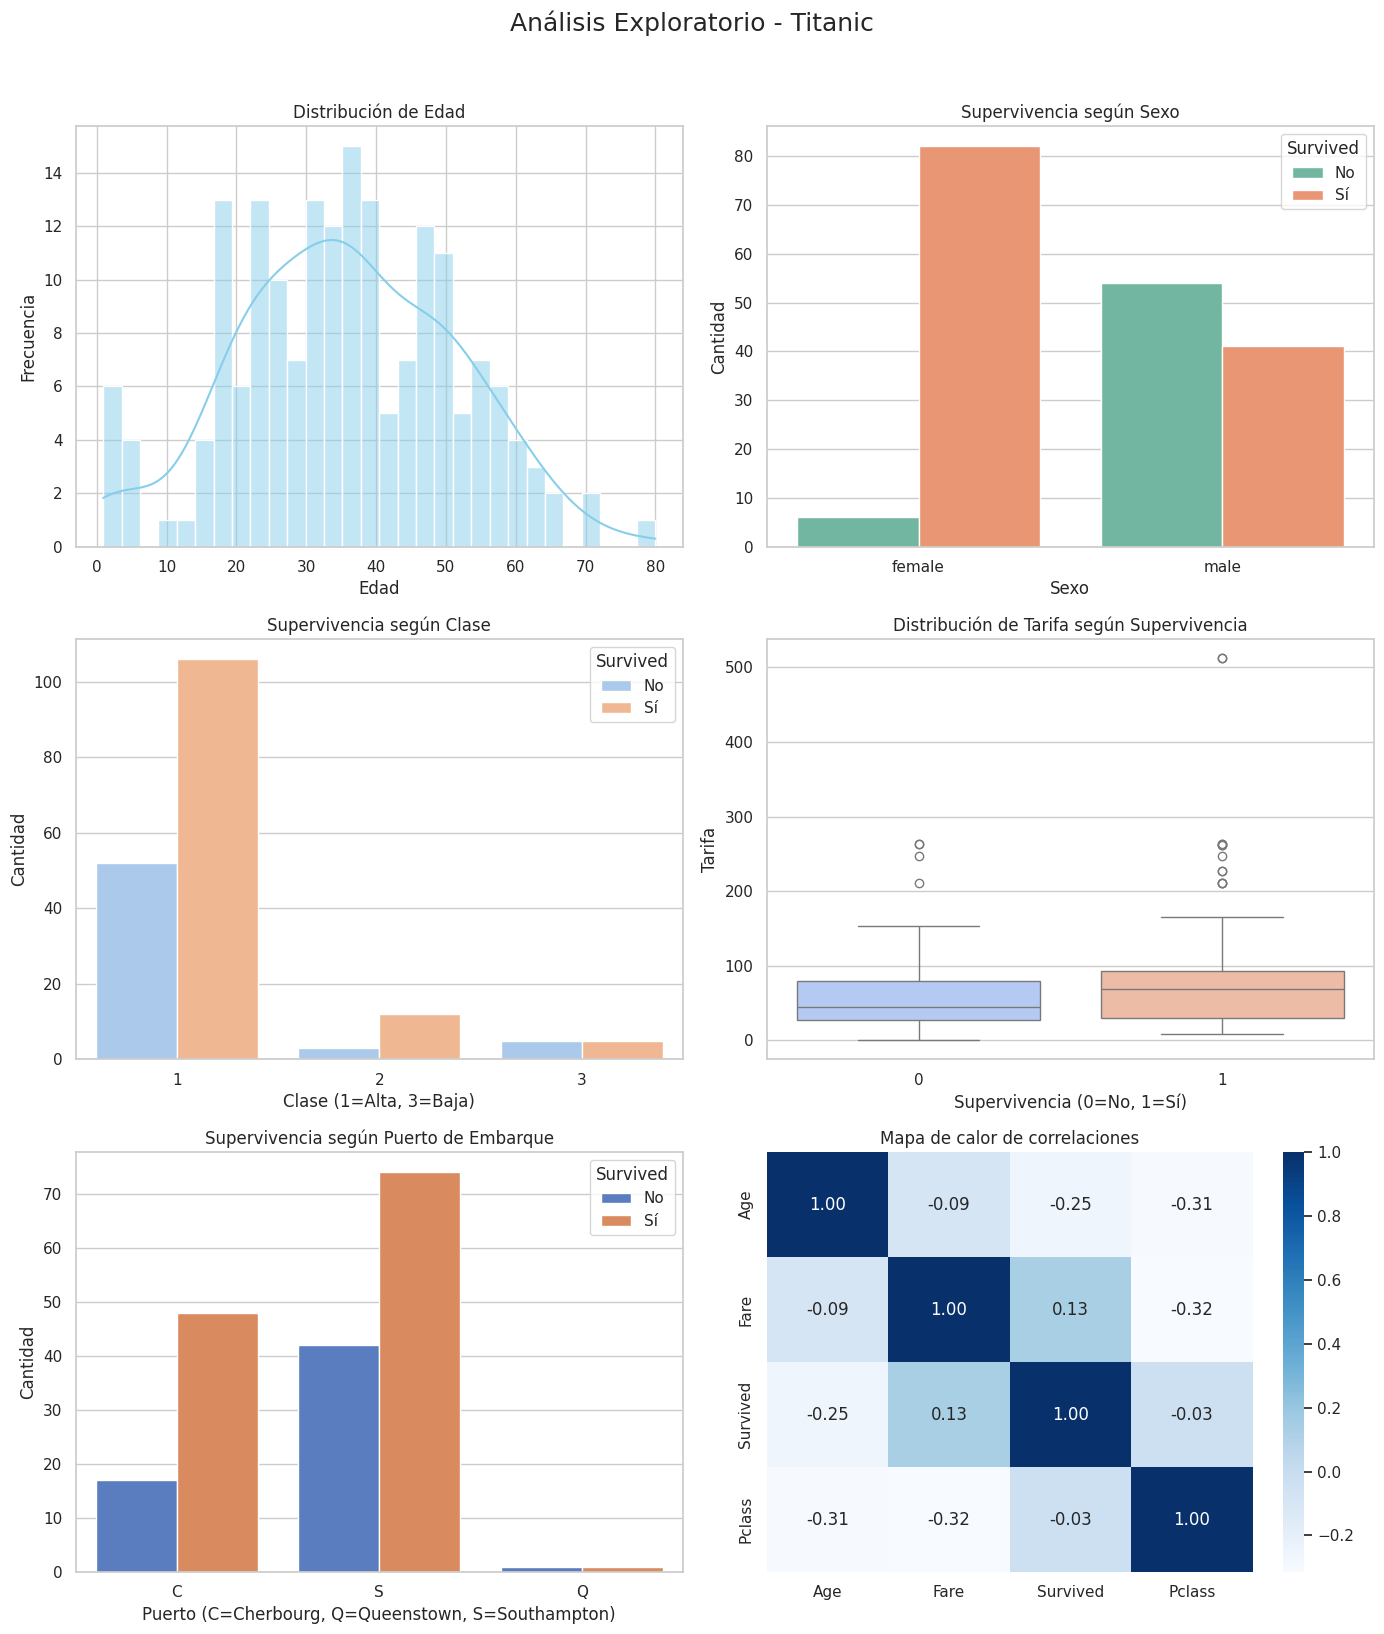

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(14, 16))  # 3 filas x 2 columnas
fig.suptitle("Análisis Exploratorio - Titanic", fontsize=18, y=1.02)

# 1. Distribución de Edad
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Distribución de Edad")
axes[0,0].set_xlabel("Edad")
axes[0,0].set_ylabel("Frecuencia")

# 2. Supervivencia por Sexo
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Supervivencia según Sexo")
axes[0,1].set_xlabel("Sexo")
axes[0,1].set_ylabel("Cantidad")
axes[0,1].legend(title="Survived", labels=["No", "Sí"])

# 3. Supervivencia por Clase
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1,0], palette="pastel")
axes[1,0].set_title("Supervivencia según Clase")
axes[1,0].set_xlabel("Clase (1=Alta, 3=Baja)")
axes[1,0].set_ylabel("Cantidad")
axes[1,0].legend(title="Survived", labels=["No", "Sí"])

# 4. Tarifa vs Supervivencia
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1,1], palette="coolwarm")
axes[1,1].set_title("Distribución de Tarifa según Supervivencia")
axes[1,1].set_xlabel("Supervivencia (0=No, 1=Sí)")
axes[1,1].set_ylabel("Tarifa")

# 5. Supervivencia por Puerto de Embarque
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2,0], palette="muted")
axes[2,0].set_title("Supervivencia según Puerto de Embarque")
axes[2,0].set_xlabel("Puerto (C=Cherbourg, Q=Queenstown, S=Southampton)")
axes[2,0].set_ylabel("Cantidad")
axes[2,0].legend(title="Survived", labels=["No", "Sí"])

# 6. Heatmap de correlaciones
sns.heatmap(df[['Age','Fare','Survived','Pclass']].corr(), annot=True, cmap="Blues", fmt=".2f", ax=axes[2,1])
axes[2,1].set_title("Mapa de calor de correlaciones")

plt.tight_layout()
plt.show()

A partir de este análisis exploratorio, se pueden observar varios patrones relevantes. La distribución de la edad muestra una mayor concentración de pasajeros adultos jóvenes entre 20 y 40 años. El análisis de supervivencia revela que las mujeres tuvieron una probabilidad mucho mayor de sobrevivir que los hombres, mientras que la clase también jugó un papel clave: los pasajeros de primera clase tuvieron mayores tasas de supervivencia en comparación con los de segunda y, especialmente, tercera clase. En cuanto a la tarifa, se observa que quienes pagaron más por su boleto (tarifas más altas) tendieron a tener más probabilidades de sobrevivir. Respecto al puerto de embarque, los pasajeros que embarcaron en Cherbourg tuvieron una tasa de supervivencia relativamente mayor que los de Southampton o Queenstown. Finalmente, el mapa de calor de correlaciones confirma estas relaciones: la variable Pclass está negativamente correlacionada con la supervivencia, mientras que la tarifa tiene una correlación positiva moderada, lo que refuerza la idea de que el nivel socioeconómico influyó de manera importante en la probabilidad de sobrevivir.

## Modelo de clasificación

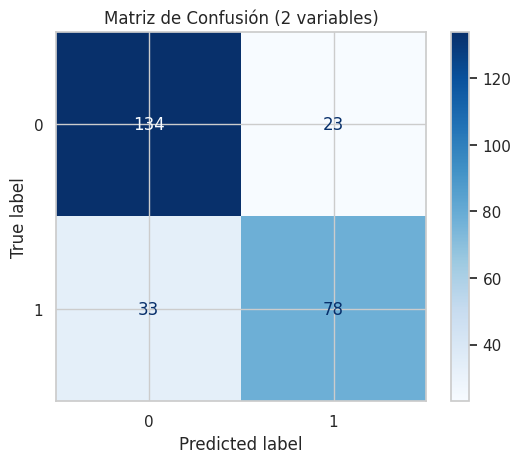

Métricas con 2 variables (Sex + Pclass):
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0 (por defecto)


# 1. Modelo con 2 variables (Sex y Pclass)

X = df[['Sex','Pclass']]
y = df['Survived']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión y métricas
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión (2 variables)")
plt.show()

print("Métricas con 2 variables (Sex + Pclass):")
print(classification_report(y_test, y_pred))




Del primer modelo de clasificación con las variables Sexo y Clase, se puede observar un desempeño aceptable con una exactitud del 79%. El modelo logra predecir mejor a los pasajeros que no sobrevivieron (clase 0, recall de 0.85) en comparación con los que sí sobrevivieron (clase 1, recall de 0.70), lo que indica cierto sesgo hacia la predicción de muertes. Esto refleja que el sexo y la clase social fueron variables relevantes para la supervivencia en el Titanic, pero no son suficientes por sí solas para capturar todos los patrones, lo que abre la necesidad de incluir más variables para mejorar la sensibilidad hacia los sobrevivientes.

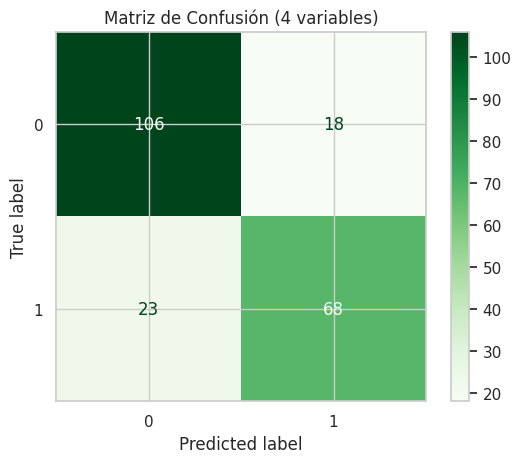

Métricas con más variables (Sex + Pclass + Age + Fare):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       124
           1       0.79      0.75      0.77        91

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



In [ ]:

# 2. Modelo con 4 variables (Sex, Pclass, Age, Fare)

X2 = df[['Sex','Pclass','Age','Fare']]
y = df['Survived']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

#Dado que se encontraron naaN se deben eliminar para poder ejecutar la regresion

X_train2 = X_train2.dropna()
y_train2 = y_train2.loc[X_train2.index]

X_test2 = X_test2.dropna()
y_test2 = y_test2.loc[X_test2.index]

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

# Matriz de confusión y métricas
cm2 = confusion_matrix(y_test2, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model2.classes_)
disp2.plot(cmap="Greens")
plt.title("Matriz de Confusión (4 variables)")
plt.show()

print("Métricas con más variables (Sex + Pclass + Age + Fare):")
print(classification_report(y_test2, y_pred2))

Del segundo modelo con mas variables, Sexo, Clase, Edad y Tarifa, logra una ligera mejora en el rendimiento general con una exactitud del 81%, frente al 79% del modelo anterior. La precisión y el recall aumentan un poco en la predicción de los pasajeros que sobrevivieron (clase 1), alcanzando un recall de 0.75 (antes 0.70), lo que indica que ahora el modelo es más sensible a la detección de sobrevivientes. Sin embargo, aún predice mejor a los que no sobrevivieron (clase 0). Incluir más variables aporto información útil, aunque el modelo todavía presenta un cierto desbalance para predecir las muertes.

# Conclusión

En el análisis de las dos bases de datos se evidencian varios hallazgos. En el caso del Titanic, se trabajó con modelos de clasificación para predecir la supervivencia de los pasajeros. El primer modelo, con solo dos variables (Sexo y Clase), alcanzó un 79% de exactitud. Al incluir más variables (Edad y Tarifa), el desempeño mejoró ligeramente hasta un 81%, demostrando que el enriquecimiento de la información aporta valor al modelo, aunque persiste una mayor facilidad para predecir a quienes no sobrevivieron frente a los sobrevivientes. Por su parte, en la base de Housing, se aplicó un modelo de regresión lineal para explicar el valor medio de las viviendas  a partir de variables como el número de habitaciones, el nivel socioeconómico y la razón de estudiantes por profesor. El análisis mostró que el número de habitaciones se relaciona positivamente con el precio, mientras que factores como un mayor porcentaje de población de bajos ingresos y relaciones de alumnos por profesor elevadas afectan negativamente el valor de las viviendas.